In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.0 MB/s eta 0:00:00


In [3]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00


In [4]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=76815a200dc5d2321a7d290331625cb572e103f763be7611ab9b4c2fdce8ff29
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Original Message:         [1, 1, 0, 0]
Signer Bases:             [0, 0, 1, 1]
Recipient Bases:          [1, 1, 0, 1]
Quantum Signature:        ['|1>', '|1>', '|+>', '|+>']
Measurement Results:      {'0001': 128, '0011': 112, '0111': 147, '0101': 119, '0010': 133, '0000': 142, '0110': 121, '0100': 122}


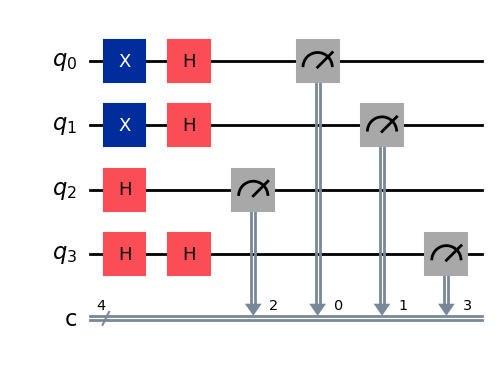

In [137]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import random

# --- Funções auxiliares ---
def random_bits(n):
    return [random.randint(0, 1) for _ in range(n)]

def state_label(bit, base):
    """Retorna o estado quântico correspondente (a assinatura real)."""
    if base == 0:  # base computacional
        return "|0>" if bit == 0 else "|1>"
    else:          # base de Hadamard
        return "|+>" if bit == 0 else "|->"

def prepare_signature(bits, bases):
    """
    Prepara o circuito de assinatura (QDS simplificado).
    """
    n = len(bits)
    qreg = QuantumRegister(n, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    # Codificação dos bits em bases aleatórias
    for i in range(n):
        if bits[i] == 1:
            qc.x(i)
        if bases[i] == 1:
            qc.h(i)
    return qc

def measure_signature(qc, recipient_bases):
    """
    Mede o circuito nas bases escolhidas pelo destinatário.
    """
    n = qc.num_qubits
    meas_circ = qc.copy()
    for i in range(n):
        if recipient_bases[i] == 1:
            meas_circ.h(i)
    meas_circ.measure(range(n), range(n))
    return meas_circ

# --- Simulação ---
sim = AerSimulator()

# Mensagem de exemplo (4 bits)
message = random_bits(4)
signature_bases = random_bits(len(message))  # bases do assinante
recipient_bases = random_bits(len(message))  # bases do destinatário

# Gera a "assinatura quântica" (sequência de estados)
signature_states = [state_label(m, b) for m, b in zip(message, signature_bases)]

# Criação do circuito de assinatura
qc_signature = prepare_signature(message, signature_bases)

# Criação do circuito de medição
qc_measure = measure_signature(qc_signature, recipient_bases)

# Executa a simulação
compiled = transpile(qc_measure, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# --- Resultados ---
print("Original Message:        ", message)
print("Signer Bases:            ", signature_bases)
print("Recipient Bases:         ", recipient_bases)
print("Quantum Signature:       ", signature_states)
print("Measurement Results:     ", counts)

# Mostra o circuito


# Plota histograma
plot_histogram(counts)
plt.show()

qc_measure.draw(output="mpl")



In [ ]:
Simplified Quantum Digital Signature (QDS) Simulation

This repository contains a simplified implementation of a quantum digital signature (QDS) using the Qiskit library. The purpose is to demonstrate how to generate and measure a quantum signature using different quantum encoding bases. The code illustrates fundamental QDS concepts, such as encoding bits in random quantum bases and the influence of the chosen basis on the fidelity of the signature.

The simulation follows these steps:

Message and random bases generation:
A fixed-size message (in this example, 4 bits) is randomly generated. For each bit of the message, a quantum basis is also randomly chosen by the signer (the entity sending the signature). The possible bases are the computational basis (
∣0⟩ and ∣1⟩ and the Hadamard basis (∣+⟩ and ∣−⟩).

Quantum encoding of the signature:
Each bit of the message is encoded in the corresponding quantum state according to the signer's chosen basis. If the bit is 1, the X gate is applied (flipping )
∣0⟩ to ∣1⟩. If the basis is Hadamard, the H gate is applied to place the qubit in superposition.

Measurement of the signature by the recipient:
The recipient randomly chooses measurement bases for each qubit. If the measurement basis is Hadamard, the H gate is applied before measurement. All qubits are measured, and the results are stored in classical registers.

Simulation and results:
The quantum circuit is executed on Qiskit's Aer simulator with multiple repetitions (shots) to gather statistics. The results show the correspondence between the states sent by the signer and the states measured by the recipient, allowing observation of how the choice of bases affects the signature.

Visualization:
The code allows visualization of the quantum circuit in text format or color (using "mpl") and generates histograms showing the distribution of measurement outcomes.

Summary:
This simulation demonstrates the basic principles of a quantum digital signature:

Encoding in random quantum bases ensures security and allows verification of the signature's authenticity.

Measurement in different bases introduces uncertainty, reflecting fundamental properties of quantum mechanics.

Using a quantum simulator allows testing and visualizing the system's behavior without requiring physical hardware.